# Deconvolution2_2
Example to illustrate the Gold deconvolution (class TSpectrum2).




**Author:**  Miroslav Morhac, Olivier Couet  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:21 AM.</small></i>

In [1]:
Int_t i, j;
const Int_t nbinsx = 64;
const Int_t nbinsy = 64;
Double_t xmin = 0;
Double_t xmax = (Double_t)nbinsx;
Double_t ymin = 0;
Double_t ymax = (Double_t)nbinsy;
Double_t** source = new Double_t*[nbinsx];
for (i=0;i<nbinsx;i++)
   source[i]=new Double_t[nbinsy];
TString dir  = gROOT->GetTutorialDir();
TString file = dir+"/spectrum/TSpectrum2.root";
TFile *f     = new TFile(file.Data());
auto decon=(TH2F*) f->Get("decon2");
Double_t** response = new Double_t*[nbinsx];
for (i=0;i<nbinsx;i++)
   response[i]=new Double_t[nbinsy];
auto resp=(TH2F*) f->Get("resp2");
gStyle->SetOptStat(0);
auto *s = new TSpectrum2();
for (i = 0; i < nbinsx; i++){
   for (j = 0; j < nbinsy; j++){
      source[i][j] = decon->GetBinContent(i + 1,j + 1);
   }
}
for (i = 0; i < nbinsx; i++){
   for (j = 0; j < nbinsy; j++){
      response[i][j] = resp->GetBinContent(i + 1,j + 1);
   }
}
s->Deconvolution(source,response,nbinsx,nbinsy,1000,1,1);
for (i = 0; i < nbinsx; i++){
   for (j = 0; j < nbinsy; j++)
      decon->SetBinContent(i + 1,j + 1, source[i][j]);
}
decon->Draw("SURF2");

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Draw all canvases 

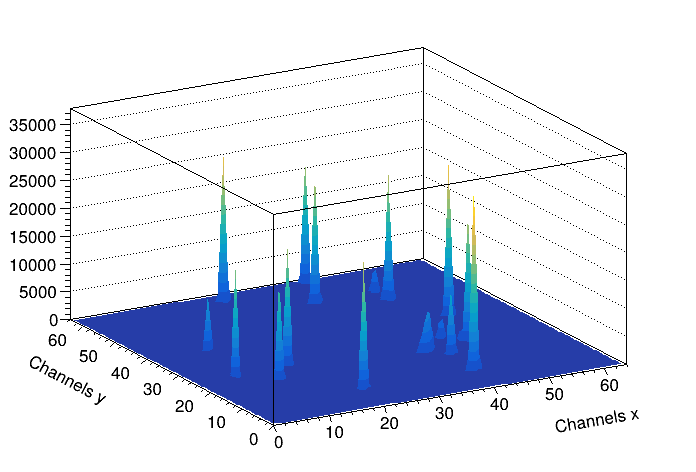

In [2]:
gROOT->GetListOfCanvases()->Draw()